<a href="https://colab.research.google.com/github/tanushree-dwibedi/Celebal-Project/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


Saving Mall_Customers.csv to Mall_Customers (1).csv


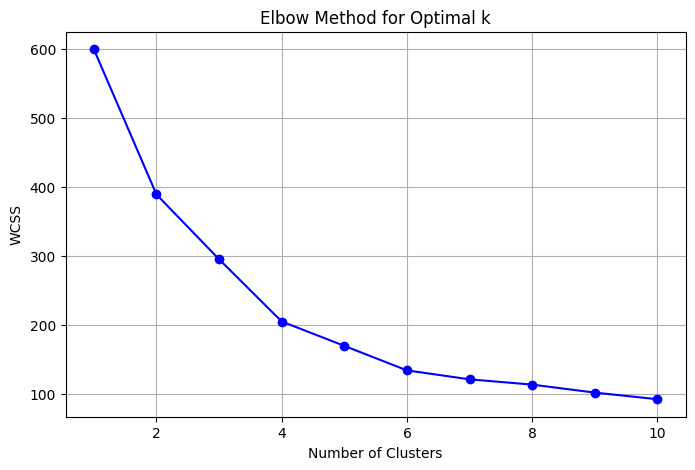

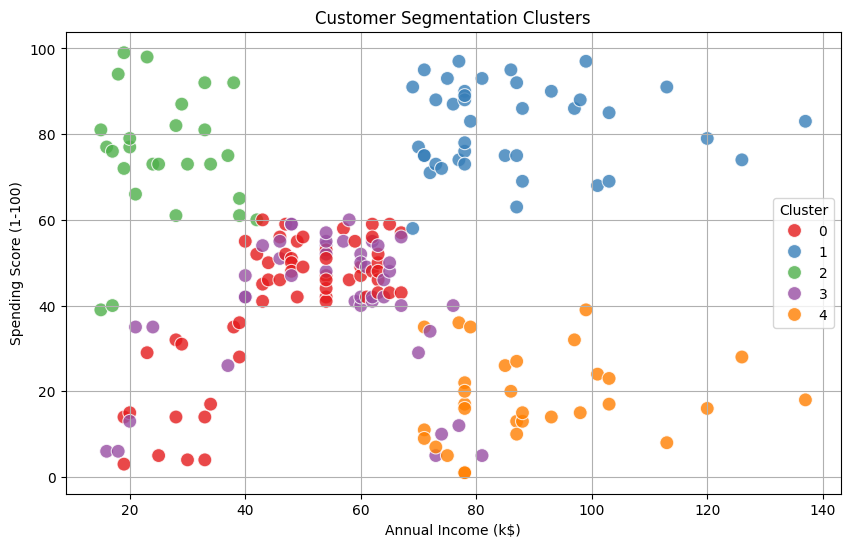

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,2


In [6]:
# ✅ Step 1: Upload the CSV file manually
from google.colab import files
uploaded = files.upload()

# ✅ Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ✅ Step 3: Load the uploaded file
df = pd.read_csv('Mall_Customers.csv')

# ✅ Step 4: Preprocess the data
df.drop("CustomerID", axis=1, inplace=True)
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

# ✅ Step 5: Scale features
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 6: Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# ✅ Step 7: Apply KMeans (k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ✅ Step 8: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    data=df,
    palette="Set1",
    s=100,
    alpha=0.8
)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# ✅ Step 9: View the first few rows
df.head()


In [7]:
print("Shape:", df.shape)
df.head()

Shape: (200, 5)


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,2
